# MICROPROYECTO 2 - CLUSTERING

EQUIPO 5:

Santiago Arias Gallo

Camilo Jose Funez García

Nicolas Mosquera Rivera


#Definiciones

**Años esperados de escolaridad:**
Los años esperados de escolaridad son la cantidad de años durante los cuales un niño de 2 años puede esperar pasar en la escuela, según las tasas de matriculación escolar en una fecha determinada.

**El Índice de Desarrollo Humano (IDH):**
El Índice de Desarrollo Humano (IDH) es un índice que mide dimensiones clave del desarrollo humano. Las tres dimensiones clave son:

- Una vida larga y saludable, medida por la esperanza de vida.

- Acceso a la educación: medido en función de los años esperados de escolarización de los niños en edad de ingresar a la escuela y la media de años de escolaridad de la población adulta.

- Y un nivel de vida digno, medido por el Ingreso Nacional Bruto per cápita ajustado al nivel de precios del país.

#Importación de librerías y limpieza de datos

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

Carga de datos:
- para este proceso se utilizo el comando read_csv el cual permite leer el dataframe , sin embargo este estaba en utf-8, por lo cual lo transformamos en latin-1 y leerlo sin problemas, ademas se ignora la fila 1 con skiprows.


In [ ]:
from google.colab import files
import io

uploaded = files.upload()

#Se cambia a encode latin-1 ya que el archivo en utf-8 no codifica
#Se omite la fila 1
schoolingdforig = pd.read_csv(io.BytesIO(uploaded["Expected years of schooling (years).csv"]), skiprows=1, encoding="latin-1", sep = ',')
schoolingdforig


Saving Expected years of schooling (years).csv to Expected years of schooling (years).csv


,HDI Rank (2017),Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,1994,Unnamed: 11,1995,Unnamed: 13,1996,Unnamed: 15,1997,Unnamed: 17,1998,Unnamed: 19,1999,Unnamed: 21,2000,Unnamed: 23,2001,Unnamed: 25,2002,Unnamed: 27,2003,Unnamed: 29,2004,Unnamed: 31,2005,Unnamed: 33,2006,Unnamed: 35,2007,Unnamed: 37,2008,Unnamed: 39,2009,Unnamed: 41,2010,Unnamed: 43,2011,Unnamed: 45,2012,Unnamed: 47,2013,Unnamed: 49,2014,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57
0,168,Afghanistan,2.6,..,2.9,..,3.2,..,3.6,..,3.9,..,4.2,..,4.6,..,4.9,..,5.2,..,5.5,..,5.9,..,6.2,..,6.5,..,6.8,..,7.9,..,8.1,..,8.4,..,8.7,..,8.9,..,9.2,..,9.5,..,9.8,..,10.0,..,10.2,..,10.4,..,10.4,..,10.4,..,10.4,a
1,68,Albania,11.6,..,11.8,..,10.7,..,10.2,..,10.1,..,10.2,..,10.3,..,10.6,..,10.7,..,10.7,..,10.6,..,10.7,..,10.8,..,11.0,..,10.9,..,11.5,..,11.6,..,12.0,..,12.2,..,12.3,..,13.1,..,13.8,..,14.7,..,14.8,..,14.8,..,14.8,..,14.8,..,14.8,a
2,85,Algeria,9.6,..,9.7,..,9.8,..,9.8,..,9.9,..,9.8,..,10.0,..,10.3,..,10.5,..,10.7,..,10.9,..,11.1,..,11.5,..,11.7,..,12.0,..,12.3,..,12.3,..,12.6,..,13.1,..,13.6,..,14.0,..,14.3,..,14.3,..,14.3,..,14.3,..,14.3,..,14.3,..,14.4,a
3,35,Andorra,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,10.8,..,11.0,..,10.9,..,10.8,..,10.8,..,11.2,..,11.2,..,11.7,..,11.7,..,11.7,..,11.7,..,13.5,..,13.5,..,13.5,..,13.5,..,13.5,..,13.5,"a,b"
4,147,Angola,3.8,..,3.6,..,3.5,..,3.7,..,3.8,..,3.9,..,4.0,..,4.1,..,4.2,..,4.6,..,5.1,..,5.5,..,5.9,..,6.4,..,6.8,..,7.2,..,7.7,..,8.1,..,8.5,..,9.0,..,8.6,..,9.5,..,9.9,..,10.3,..,10.7,..,11.0,..,11.4,..,11.8,"a,c"
5,70,Antigua and Barbuda,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,13.3,..,13.3,..,13.3,..,13.1,..,13.0,..,12.9,..,12.6,..,12.8,..,13.0,..,13.0,..,13.3,..,13.2,..,13.2,"a,d"
6,47,Argentina,13.2,..,13.2,..,13.2,..,13.1,..,13.1,..,13.3,..,13.5,..,13.8,..,14.0,..,15.0,..,15.6,..,16.3,..,16.4,..,16.3,..,16.3,..,16.1,..,16.3,..,16.3,..,16.5,..,16.8,..,17.1,..,17.2,..,17.2,..,17.1,..,17.3,..,17.4,..,17.4,..,17.4,a
7,83,Armenia,10.7,..,10.7,..,10.6,..,10.8,..,10.4,..,10.2,..,10.0,..,10.4,..,11.1,..,11.2,..,11.1,..,10.8,..,10.8,..,10.9,..,10.9,..,11.2,..,11.7,..,12.3,..,12.4,..,13.0,..,13.0,..,13.0,..,13.0,..,13.0,..,13.0,..,13.0,..,13.0,..,13.0,a
8,3,Australia,17.4,..,17.3,..,17.3,..,17.3,..,17.3,..,18.8,..,19.4,..,20.2,..,20.1,..,20.4,..,20.5,..,20.1,..,20.6,..,20.7,..,20.3,..,20.3,..,19.0,..,19.1,..,19.1,..,19.5,..,19.8,..,20.1,..,20.3,..,20.4,..,20.4,..,23.3,..,22.9,..,22.9,"a,e"
9,20,Austria,14.0,..,14.1,..,14.4,..,14.4,..,14.8,..,14.9,..,14.9,..,15.0,..,15.7,..,15.4,..,15.5,..,16.1,..,14.7,..,14.7,..,14.9,..,15.0,..,15.2,..,15.1,..,15.3,..,15.4,..,16.0,..,16.0,..,16.1,..,15.8,..,15.8,..,15.9,..,16.1,..,16.1,a


Se observan problemas al cargar los datos. Primero se eliminaran las columnas unnamed, esto lo hacemos con el comando loc, con este identificamos donde se encuentran todos los datos que sean unnamed.

In [ ]:
# Se eliminan las columnas Unnamed creadas al leerse los datos
schoolingdforig= schoolingdforig.loc[:, ~schoolingdforig.columns.str.contains('^Unnamed')]
schoolingdforig

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,5.2,5.5,5.9,6.2,6.5,6.8,7.9,8.1,8.4,8.7,8.9,9.2,9.5,9.8,10.0,10.2,10.4,10.4,10.4,10.4
1,68,Albania,11.6,11.8,10.7,10.2,10.1,10.2,10.3,10.6,10.7,10.7,10.6,10.7,10.8,11.0,10.9,11.5,11.6,12.0,12.2,12.3,13.1,13.8,14.7,14.8,14.8,14.8,14.8,14.8
2,85,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10.0,10.3,10.5,10.7,10.9,11.1,11.5,11.7,12.0,12.3,12.3,12.6,13.1,13.6,14.0,14.3,14.3,14.3,14.3,14.3,14.3,14.4
3,35,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,11.0,10.9,10.8,10.8,11.2,11.2,11.7,11.7,11.7,11.7,13.5,13.5,13.5,13.5,13.5,13.5
4,147,Angola,3.8,3.6,3.5,3.7,3.8,3.9,4.0,4.1,4.2,4.6,5.1,5.5,5.9,6.4,6.8,7.2,7.7,8.1,8.5,9.0,8.6,9.5,9.9,10.3,10.7,11.0,11.4,11.8
5,70,Antigua and Barbuda,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,13.3,13.3,13.3,13.1,13.0,12.9,12.6,12.8,13.0,13.0,13.3,13.2,13.2
6,47,Argentina,13.2,13.2,13.2,13.1,13.1,13.3,13.5,13.8,14.0,15.0,15.6,16.3,16.4,16.3,16.3,16.1,16.3,16.3,16.5,16.8,17.1,17.2,17.2,17.1,17.3,17.4,17.4,17.4
7,83,Armenia,10.7,10.7,10.6,10.8,10.4,10.2,10.0,10.4,11.1,11.2,11.1,10.8,10.8,10.9,10.9,11.2,11.7,12.3,12.4,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
8,3,Australia,17.4,17.3,17.3,17.3,17.3,18.8,19.4,20.2,20.1,20.4,20.5,20.1,20.6,20.7,20.3,20.3,19.0,19.1,19.1,19.5,19.8,20.1,20.3,20.4,20.4,23.3,22.9,22.9
9,20,Austria,14.0,14.1,14.4,14.4,14.8,14.9,14.9,15.0,15.7,15.4,15.5,16.1,14.7,14.7,14.9,15.0,15.2,15.1,15.3,15.4,16.0,16.0,16.1,15.8,15.8,15.9,16.1,16.1


Se puede observar que hay filas con datos faltantes NaN o .., aplicaremos el método de eliminación para manejar estos datos.

In [ ]:
schoolingdf=schoolingdforig
schoolingdf=schoolingdf.dropna(axis='rows')[(schoolingdf != "..").all(axis=1)]#Se eliminan las filas con NaN y ..
schoolingdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,2.6,2.9,3.2,3.6,3.9,4.2,4.6,4.9,5.2,5.5,5.9,6.2,6.5,6.8,7.9,8.1,8.4,8.7,8.9,9.2,9.5,9.8,10.0,10.2,10.4,10.4,10.4,10.4
1,68,Albania,11.6,11.8,10.7,10.2,10.1,10.2,10.3,10.6,10.7,10.7,10.6,10.7,10.8,11.0,10.9,11.5,11.6,12.0,12.2,12.3,13.1,13.8,14.7,14.8,14.8,14.8,14.8,14.8
2,85,Algeria,9.6,9.7,9.8,9.8,9.9,9.8,10.0,10.3,10.5,10.7,10.9,11.1,11.5,11.7,12.0,12.3,12.3,12.6,13.1,13.6,14.0,14.3,14.3,14.3,14.3,14.3,14.3,14.4
3,35,Andorra,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.8,11.0,10.9,10.8,10.8,11.2,11.2,11.7,11.7,11.7,11.7,13.5,13.5,13.5,13.5,13.5,13.5
4,147,Angola,3.8,3.6,3.5,3.7,3.8,3.9,4.0,4.1,4.2,4.6,5.1,5.5,5.9,6.4,6.8,7.2,7.7,8.1,8.5,9.0,8.6,9.5,9.9,10.3,10.7,11.0,11.4,11.8
6,47,Argentina,13.2,13.2,13.2,13.1,13.1,13.3,13.5,13.8,14.0,15.0,15.6,16.3,16.4,16.3,16.3,16.1,16.3,16.3,16.5,16.8,17.1,17.2,17.2,17.1,17.3,17.4,17.4,17.4
7,83,Armenia,10.7,10.7,10.6,10.8,10.4,10.2,10.0,10.4,11.1,11.2,11.1,10.8,10.8,10.9,10.9,11.2,11.7,12.3,12.4,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
8,3,Australia,17.4,17.3,17.3,17.3,17.3,18.8,19.4,20.2,20.1,20.4,20.5,20.1,20.6,20.7,20.3,20.3,19.0,19.1,19.1,19.5,19.8,20.1,20.3,20.4,20.4,23.3,22.9,22.9
9,20,Austria,14.0,14.1,14.4,14.4,14.8,14.9,14.9,15.0,15.7,15.4,15.5,16.1,14.7,14.7,14.9,15.0,15.2,15.1,15.3,15.4,16.0,16.0,16.1,15.8,15.8,15.9,16.1,16.1
10,80,Azerbaijan,10.7,10.6,10.6,10.4,10.1,10.0,9.8,9.7,9.9,10.1,10.4,10.6,10.8,11.0,11.2,10.7,11.6,11.6,11.6,11.7,11.7,11.8,11.9,12.2,12.7,12.7,12.7,12.7


Veamos ahora que tipo de datos tenemos en el dataset, se observa entonces que son objetos por lo cual debemos de convertirlos para poder trabajar con ellos mas adelante.

In [ ]:
schoolingdf.dtypes

HDI Rank (2017)    object
Country            object
1990               object
1991               object
1992               object
1993               object
1994               object
1995               object
1996               object
1997               object
1998               object
1999               object
2000               object
2001               object
2002               object
2003               object
2004               object
2005               object
2006               object
2007               object
2008               object
2009               object
2010               object
2011               object
2012               object
2013               object
2014               object
2015               object
2016               object
2017               object
dtype: object

Siguiendo con las instrucciones dadas, se eligen 3 años espaciados por un tiempo similar (1990, 2003 y 2017) para trabajar. También se aísla la columna HDI Rank (2017), pues ésta se necesitará más adelante.
Luego, como se vió antes, los tipos de datos de todas las columnas son de tipo object, pero necesitamos que, por lo menos, los 3 años con los que vamos a trabajar sean reconocidos como floats para realizar operaciones con ellos.

In [ ]:
schoolingdf_CR=schoolingdf[['Country','HDI Rank (2017)']]#Se aísla la columna HDI Rank (2017)
schoolingdf=schoolingdf[['1990','2003','2017']]# Se seleccionan los años 1990, 2003 y 2017
schoolingdf=schoolingdf.apply(pd.to_numeric)#Se cambian los datos a float
schoolingdf.dtypes

1990    float64
2003    float64
2017    float64
dtype: object

#Agrupamiento

Una vez se tienen los años seleccionados y se corrige el tipo de dato, se procederá a buscar los clusters por el método Elbow Curve que lo que busca es la minimización de la varianza intra-cluster y la maximización de la varianza inter-cluster. Es decir, queremos que cada observación se encuentre muy cerca a las de su mismo grupo y los grupos lo más lejos posible entre ellos.

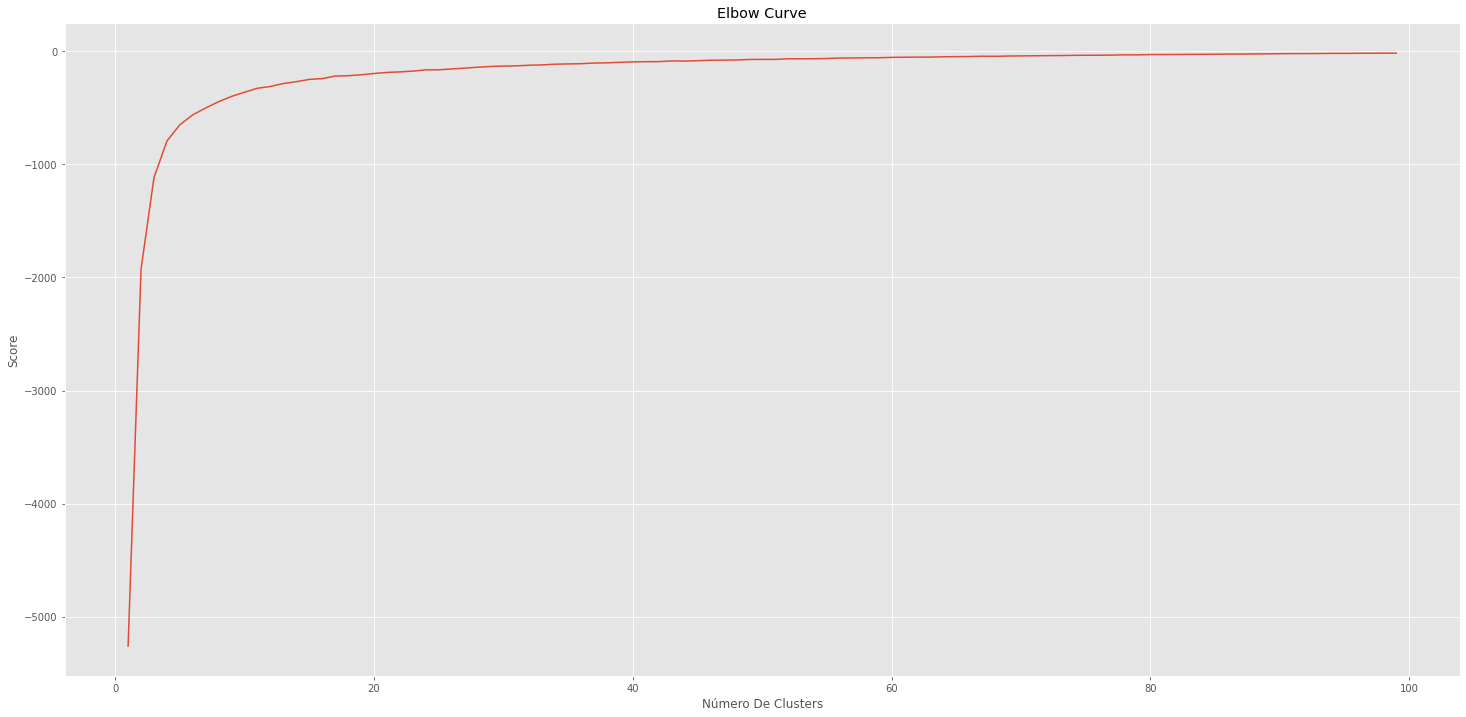

In [ ]:
Nc=range(1,100)
kmeans=[KMeans(n_clusters=i) for i in Nc]
score= [kmeans[i].fit(schoolingdf).score(schoolingdf) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número De Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Se probarón entre 1 y 100 grupos, y la gráfica muestra que el valor ideal de clusters esta entre 1 y 10. Se procede entonces a graficar nuevamente entre este intervalo para una mejor visualización

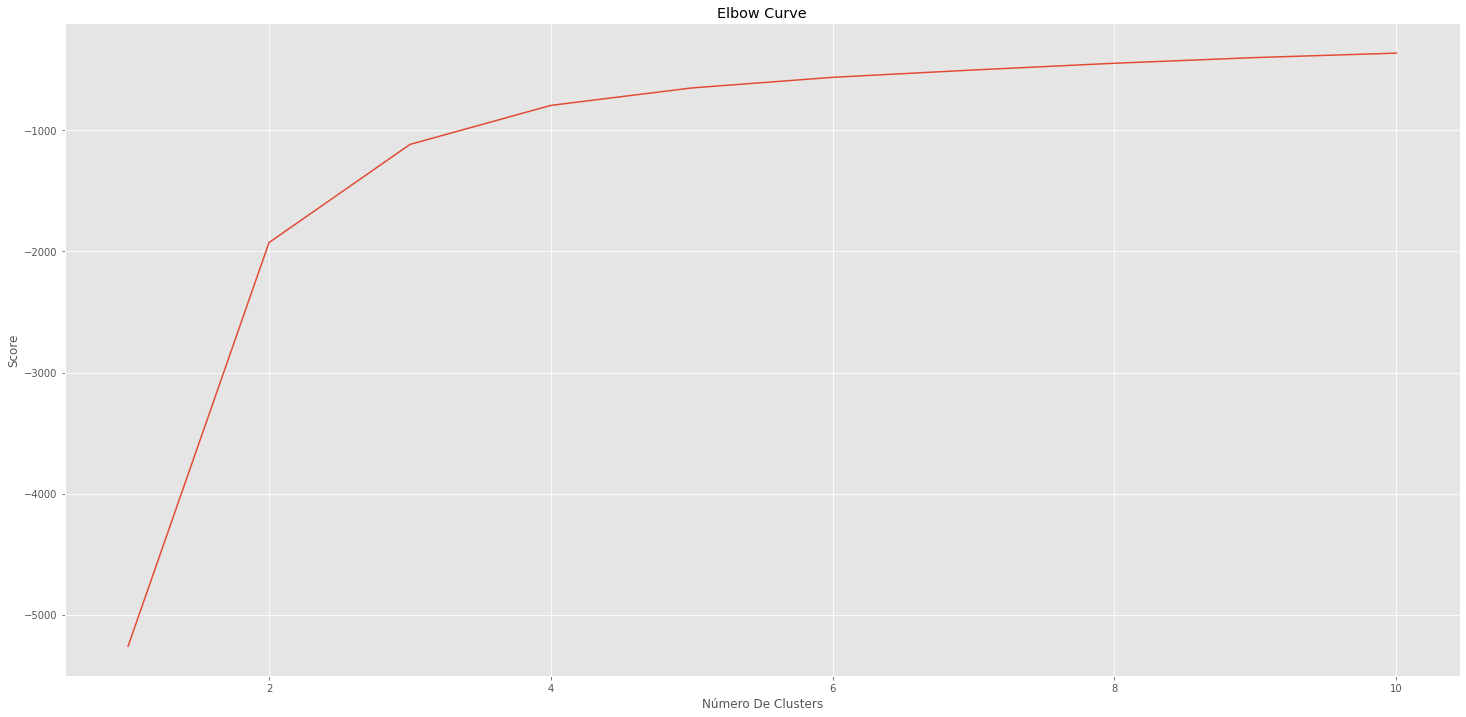

In [ ]:
plt.plot(Nc[0:10],score[0:10])
plt.xlabel('Número De Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva anterior muestra que el valor k de clusters óptimo es de k=3. Se procede entonces a ajustar el modelo con ese valor.

In [ ]:
kmeans_Model = KMeans(n_clusters=3, max_iter=1000, random_state=0).fit(schoolingdf)# k=3


Y la posición de sus centroides serían

In [ ]:
centroids = kmeans_Model.cluster_centers_
centroids

array([[ 5.21818182,  7.4       , 10.00681818],
       [10.61325301, 11.9686747 , 13.38313253],
       [13.39111111, 15.79111111, 16.77555556]])

#Visualización

Teniendo el modelo ajustado y los centroides, podemos agrupar los datos y graficarlos en 3 grupos diferentes separados por una etiqueta llamada por nosotros label, el grupo rojo representa el 0, el verde el 1 y por ultimo el azul, que representa el 2.

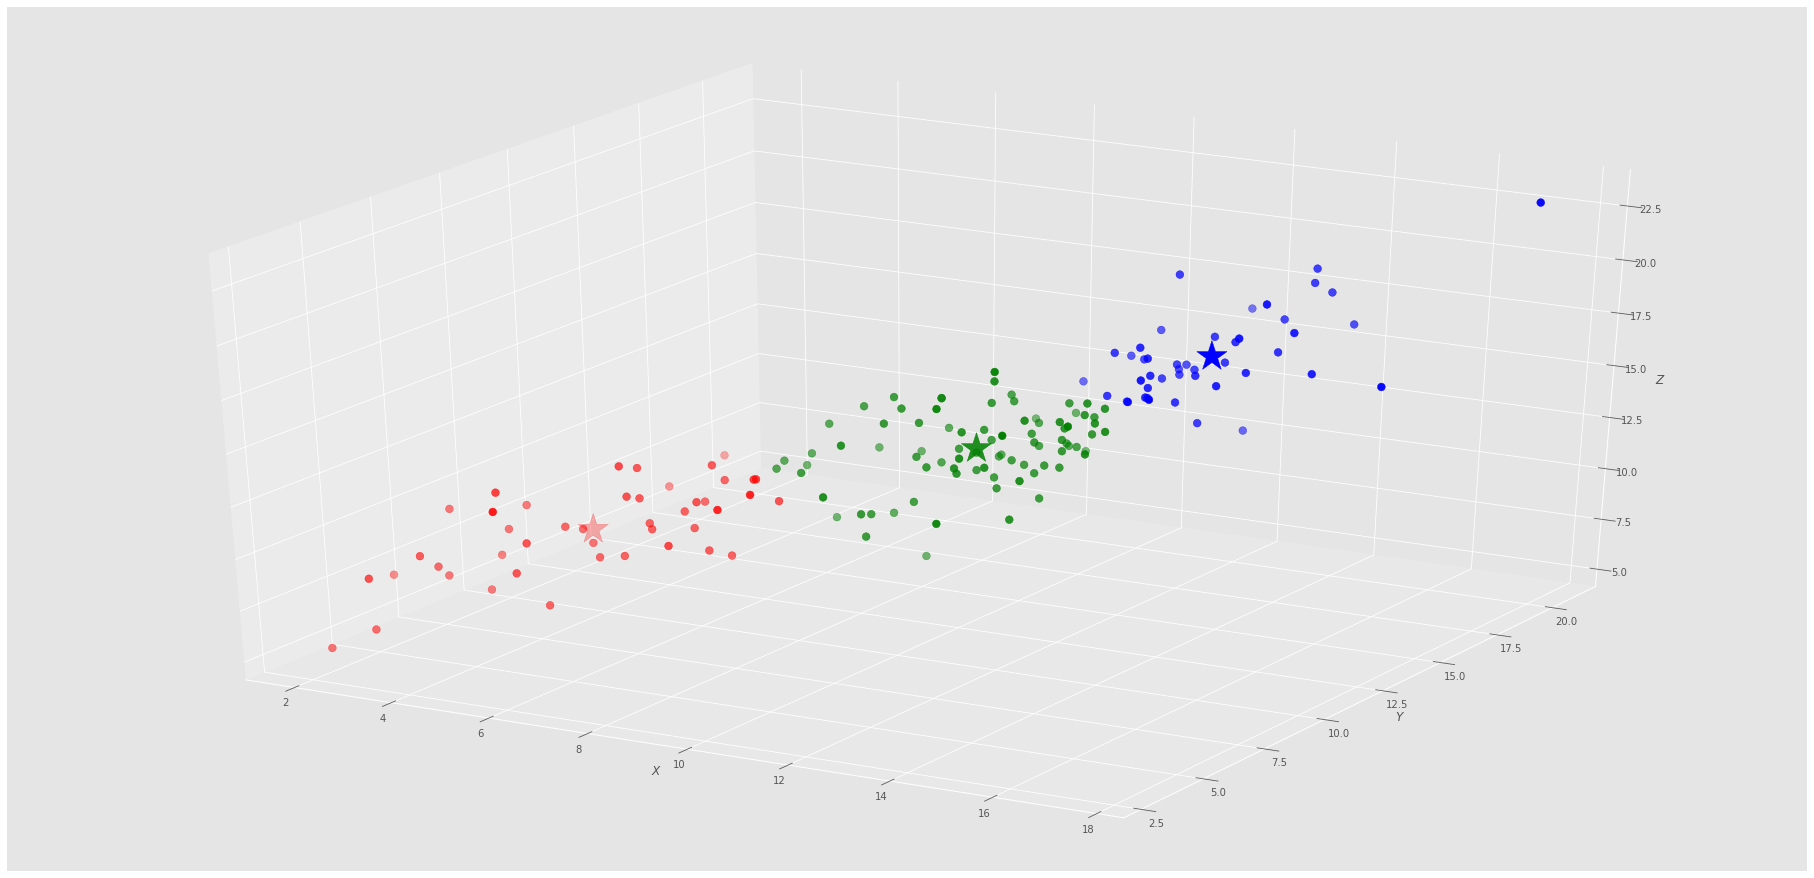

In [ ]:
labels=kmeans_Model.predict(schoolingdf)
schoolingdf["labels"]=labels
colores=['red','green','blue']
asignar=[]
for row in labels:
  asignar.append(colores[row])

fig=plt.figure()
ax=Axes3D(fig)
ax.set_xlabel("$X$")
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.scatter(schoolingdf.iloc[:,0], schoolingdf.iloc[:,1], schoolingdf.iloc[:,2], c=asignar, s=60)#Grafica los puntos segun las coordenadas
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='*', c=colores, s=1000)#Grafica los centroides


#Análisis

Se observa que hay tres grupos (scikitlearn los nombra de forma automática comenzando desde el 0), 0, 1 y 2. Y los promedios de cada grupo de la esperanza de años de educación escolar en los años estudiados son


In [ ]:
schoolingdf.groupby(by=["labels"]).mean()


,1990,2003,2017
labels,,,
0,5.218182,7.400000,10.006818
1,10.613253,11.968675,13.383133
2,13.391111,15.791111,16.775556


Podemos decir, de acuerdo a los promedios de cada año de cada grupo, que hay niveles en la esperanza de los años de escolaridad, dichos grupos y niveles los identificaremos así: 0=Promedio bajo de esperanza de años de educación escolar, estos se identifican en la gráfica anterior en color rojo. 1= Promedio intermedio de esperanza de años de educación escolar, se identifican con el color verde, y 2: Promedio alto de esperanza de años de educación escolar, se identifican con el color azul.

Ahora bien, veamos los países que pertenecen a cada grupo

In [ ]:
schoolingdf[['Country','HDI Rank (2017)']]=schoolingdf_CR[['Country','HDI Rank (2017)']]
schoolingdf.groupby(by=["labels","Country","HDI Rank (2017)"]).mean()

1990  ...  2017
labels Country                                   HDI Rank (2017)        ...      
0      Afghanistan                               168               2.6  ...  10.4
       Angola                                    147               3.8  ...  11.8
       Bangladesh                                136               5.6  ...  11.4
       Benin                                     163               5.3  ...  12.6
       Bhutan                                    134               5.4  ...  12.3
       Burkina Faso                              183               2.5  ...   8.5
       Burundi                                   185               4.4  ...  11.7
       Cambodia                                  146               6.7  ...  11.7
       Cameroon                                  151               8.0  ...  12.2
       Central African Republic                  188               5.2  ...   7.2
       Chad                                      186               3.2  ...   8.0
       Comoros                                   165               7.9  ...  11.2
       Congo (Democratic Republic of the)        176               6.8  ...   9.8
       Côte d'Ivoire                             170               5.9  ...   9.0
       Djibouti                                  172               2.7  ...   6.2
       Ethiopia                                  173               3.1  ...   8.5
       Gambia                                    174               5.1  ...   9.2
       Ghana                                     140               7.6  ...  11.6
       Guatemala                                 127               6.5  ...  10.8
       Guinea                                    175               2.9  ...   9.1
       Guinea-Bissau                             177               3.7  ...  10.5
       Haiti                                     168               7.2  ...   9.3
       India                                     130               7.6  ...  12.3
       Lao People's Democratic Republic          139               6.7  ...  11.2
       Madagascar                                161               6.4  ...  10.6
       Malawi                                    171               5.4  ...  10.8
       Mali                                      182               2.1  ...   7.7
       Mauritania                                159               3.7  ...   8.6
       Morocco                                   123               6.5  ...  12.4
       Mozambique                                180               3.7  ...   9.7
       Myanmar                                   148               6.1  ...  10.0
       Nepal                                     149               7.5  ...  12.2
       Niger                                     189               2.1  ...   5.4
       Nigeria                                   157               6.7  ...  10.0
       Pakistan                                  150               4.6  ...   8.6
       Papua New Guinea                          153               4.7  ...  10.0
       Rwanda                                    158               5.7  ...  11.2
       Senegal                                   164               4.5  ...   9.7
       Sierra Leone                              184               4.9  ...   9.8
       Solomon Islands                           152               6.0  ...  10.2
       Sudan                                     167               3.9  ...   7.4
       Tanzania (United Republic of)             154               5.5  ...   8.9
       Uganda                                    162               5.7  ...  11.6
       Yemen                                     178               7.5  ...   9.0
1      Albania                                   68               11.6  ...  14.8
       Algeria                                   85                9.6  ...  14.4
       Andorra                                   35               10.8  ...  13.5
       Armenia                                  

También podemos buscar a Colombia y ver en que nivel o grupo se ubica:

In [ ]:
schoolingdf[schoolingdf['Country']=='Colombia']

,1990,2003,2017,labels,Country,HDI Rank (2017)
36,9.1,11.3,14.4,1,Colombia,90


Donde se evidencia que Colombia se ubica en el nivel 1, es decir, con un nivel de esperanza de años de educación escolar intermedio con respecto a otros países en los años de 1990, 2003 y 2017.

Ahora, se analiza si hay relación entre los grupos y su rango de índice de desarrollo humano en el 2017. Para hacerlo, se sacan los promedios de los rangos de cada grupo

In [ ]:
schoolingdf0=schoolingdf[schoolingdf["labels"] ==0]#Se crea un nuevo dataframe que solo contenga los países del grupo 0
schoolingdf0['HDI Rank (2017)']=pd.to_numeric(schoolingdf0['HDI Rank (2017)'])#Se cambia a tipo de dato numerico la columna HDI Rank (2017)
schoolingdf1=schoolingdf[schoolingdf["labels"] ==1]#Se crea un nuevo dataframe que solo contenga los países del grupo 1
schoolingdf1['HDI Rank (2017)']=pd.to_numeric(schoolingdf1['HDI Rank (2017)'])
schoolingdf2=schoolingdf[schoolingdf["labels"] ==2]#Se crea un nuevo dataframe que solo contenga los países del grupo 2
schoolingdf2['HDI Rank (2017)']=pd.to_numeric(schoolingdf2['HDI Rank (2017)'])

schoolingdf0.describe()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,1990,2003,2017,labels,HDI Rank (2017)
count,44.000000,44.000000,44.000000,44.0,44.000000
mean,5.218182,7.400000,10.006818,0.0,161.681818
std,1.695311,1.793269,1.729417,0.0,17.568170
min,2.100000,3.100000,5.400000,0.0,123.000000
25%,3.775000,6.125000,8.975000,0.0,149.750000
50%,5.400000,7.650000,10.000000,0.0,163.500000
75%,6.550000,8.525000,11.450000,0.0,175.250000
max,8.000000,11.600000,12.600000,0.0,189.000000


Se obseva que en el grupo 0 (de promedio bajo en esperanza de años de educación escolar) hay 44 paises, el menor rango es 189, mientras que el rango más alto es 123, y el rango promedio de este grupo es de 162.

In [ ]:
schoolingdf1.describe()

,1990,2003,2017,labels,HDI Rank (2017)
count,83.000000,83.000000,83.000000,83.0,83.000000
mean,10.613253,11.968675,13.383133,1.0,89.771084
std,1.325617,1.248309,1.432107,0.0,35.170777
min,7.500000,8.900000,8.800000,1.0,9.000000
25%,9.750000,11.050000,12.600000,1.0,64.500000
50%,10.700000,12.200000,13.400000,1.0,90.000000
75%,11.700000,12.800000,14.450000,1.0,115.500000
max,12.700000,14.600000,16.900000,1.0,165.000000


Se obseva que en el grupo 1 (de promedio intermedio en esperanza de años de educación escolar) hay 83 paises, el menor rango es 165, mientras que el rango más alto es 9, y el rango promedio de este grupo es de 90.

In [ ]:
schoolingdf2.describe()

,1990,2003,2017,labels,HDI Rank (2017)
count,45.000000,45.000000,45.000000,45.0,45.000000
mean,13.391111,15.791111,16.775556,2.0,31.955556
std,1.209023,1.531313,1.636676,0.0,25.993842
min,11.100000,13.200000,13.400000,2.0,1.000000
25%,12.700000,14.700000,15.900000,2.0,13.000000
50%,13.100000,15.600000,16.400000,2.0,26.000000
75%,14.000000,16.400000,17.400000,2.0,44.000000
max,17.400000,20.700000,22.900000,2.0,108.000000


Se obseva que en el grupo 2 (de promedio alto en esperanza de años de educación escolar) hay 45 paises, el menor rango es 108, mientras que el rango más alto es 1, y el rango promedio de este grupo es de 32.

#Conclusiones

- Aunque existan países con rangos altos de HDI en grupos con promedio de años de educación escolar bajos, dichos resultados sí pueden ser correctos y congruentes, ya que, el índice de desarrollo humano no solo toma en cuenta los años esperados de escolaridad, si no también la esperanza de vida y el Ingreso Nacional Bruto per cápita.

- Colombia es un país con nivel intermedio de años esperados de escolaridad, cuyo rango de HDI es de 90, precisamente el promedio de rango en su grupo.

- Se observa que en promedio los paises tardan 27 años en alcanzar el nivel inicial de los grupos con un indice de escolaridad mayor

- Se observa que los paises en via de desarrollo son quienes estan en grupos 1 y 2, por lo cual se muestra una correlacion entre la educacion y escolaridad con el desarrollo de cada pais.

- Se observa que colombia en el año 2017 quedo solo 2 puntos por debajo del limite inferior del grupo 2, por lo  cual se esperaria que en unos años este tenga un indice de escolaridad que permita pertenecer a este grupo.

#Referencias

-https://ourworldindata.org/human-development-index

-https://www.insee.fr/en/metadonnees/definition/c1156#:~:text=Expected%20years%20of%20schooling%20are,2%20to%2029%20years%20old.

-http://hdr.undp.org/en/content/latest-human-development-index-ranking